In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolation

coding up examples from
https://mattatlincoln.github.io/teaching/numerical_methods/lecture_5/

perfrom fits to the data
(0,1),(1,3),(3,55)

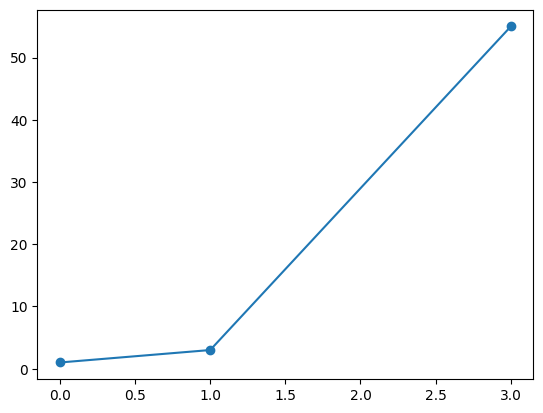

In [2]:
x = np.array([0,1,3])
y = np.array([1,3,55])
plt.scatter(x,y)
plt.plot(x,y);

In [3]:
def lerp(x,x0,y0,x1,y1):
    result = y0 + (x-x0)*(y1-y0)/(x1-x0)
    return result

output = lerp(0.5, x[0], y[0], x[1], y[1])
output

2.0

In [8]:
# create a set of x values covering the data points
modelx = np.linspace(x[0], x[2])
mylower = 0 
myupper = 1
modely = np.zeros(len(modelx))
for i, myx in enumerate(modelx):                  
    modelx = lerp(x)

TypeError: lerp() missing 4 required positional arguments: 'x0', 'y0', 'x1', and 'y1'

# Quadratic interpolation

we want a quadratic function that goes through all three data points.

In each case $a_0 + a_1 x_i + a_2 x_i^2 = y_i$

$$
\begin{bmatrix}
        1   & x_0 & x_0^2  \\
        1   & x_1 & x_1^2   \\
        1   & x_2 & x_2^2 
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}
= 
\begin{bmatrix}
y_0\\
y_1\\
y_2
\end{bmatrix}
$$

In [ ]:
A = np.zeros((3,3))

In [ ]:
for i in range(3):
    A[i,0] = 1
    A[i,1] = x[i]
    A[i,2] = x[i]**2
A

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 3., 9.]])

In [ ]:
b = np.array([1,3,55])

In [ ]:
def gaussElim(A,b):
    """
    Routine to solve problem Ax = b using gauss elim.
    A is an NxN matrix, b a column vector of size N
    returns x vector of dimentsion N
    """
    # setup our augmented matrix by copying A and b
    N = A.shape[0]
    augmat = np.zeros((N, N+1))
    augmat[:,:N] = np.copy(A)
    augmat[:,N] = np.copy(b)
    
    for pivot in range(0,N):
        refrow = pivot
        for row in range(refrow+1, N):
            ratio =  augmat[row,refrow]/augmat[refrow,refrow]
            for col in range(refrow, N+1):
                augmat[row,col] = augmat[row,col] - augmat[refrow,col]*ratio
    #print(augmat)
    # back elimination
    x = np.zeros(N)
    for row in range(N-1,-1,-1):
        x[row] = augmat[row,N] 
        for col in range(row+1, N):
            x[row] -= augmat[row,col]*x[col] 
        x[row] = x[row]/augmat[row,row]       
    #print(x)
    return x

In [ ]:
a = gaussElim(A, b)
a

array([ 1., -6.,  8.])

In [ ]:
modely = np.zeros(len(modelx))

for i in range(len(modelx)):
    modely[i] = a[0] + a[1]*modelx[i] + a[2]*modelx[i]**2
modely;

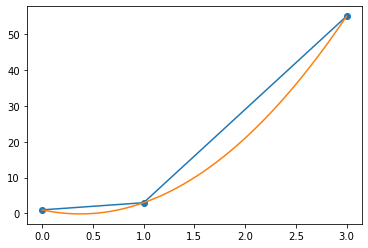

In [ ]:
plt.scatter(x,y)
plt.plot(x,y)
plt.plot(modelx, modely)

In [ ]:
def lagrangePoly(myx,x,y):
    result = 0
    for i in range(len(x)):
        presult = 1
        for j in range(len(x)):
            if (j-i)**2 < 1:
                pass
            else:
                presult *= (myx- x[j])/(x[i]-x[j])
        result += presult*y[i]
    return result

In [ ]:
lagrangePoly(1,x,y)

3.0

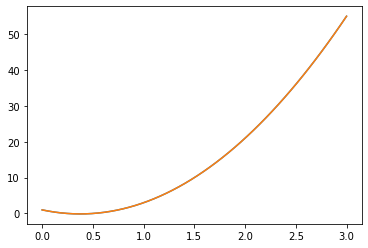

In [ ]:
plt.plot(modelx, lagrangePoly(modelx, x, y) )
plt.plot(modelx, modely);